# Phase-1 IndiaMART Hackathon
This notebook is our a working prototype solution to gauge the appropriate unit wise price range for the 3 categories(Gloves,Kurtas,Drills) based on their units by removing outliers from the data.

**Instructions for running this notebook**


*   Jupyter notebook is needed to run this notebook if it is not available Please use Colab from google  to run it.
*   required libraries to run this notebook are pandas,numpy,seaborn and scipy.
*   Incase you are running this notebook please make sure all **.csv** files are uploaded 











In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy.signal import argrelextrema
from scipy import stats

we can import the required data either from the folder or our git repository.
The given .xlsx file is split into Three parts and and converted to .csv file which is easy to handle.

In [0]:
try:
  drilldf = pd.read_csv('./phaseone-drill.csv')
  glovedf = pd.read_csv('./phaseone-gloves.csv')
  kurtadf = pd.read_csv('./phaseone-kurta.csv')
except:
  try:
    drilldf = pd.read_csv('https://raw.githubusercontent.com/nik299/IndiaMart-Hackathon-2k19/master/phaseone-drill.csv')
    glovedf = pd.read_csv('https://raw.githubusercontent.com/nik299/IndiaMart-Hackathon-2k19/master/phaseone-gloves.csv')
    kurtadf = pd.read_csv('https://raw.githubusercontent.com/nik299/IndiaMart-Hackathon-2k19/master/phaseone-kurta.csv')
  except:
    print("no file found and no internet connection")


the following piece of code prints out all unique units of the three item given

In [3]:
drill_units=drilldf['Unit'].unique()
print(drill_units,'drills')
glove_units=glovedf['Unit'].unique()
print(glove_units,'gloves')
kurta_units=kurtadf['Unit'].unique()
print(kurta_units,'kurtas')

['Piece' 'Piece(s)' 'pack' 'unit' 'Number' 'Unit' 'Pack' '1nos' 'Unit(s)'
 'kit' 'Set' 'Pc_Onwards' 'ONWARDS' 'Kit'] drills
['Pair' 'Piece' 'pack' 'Unit' 'Pack' 'Unit/Onwards' 'Pair(s)' 'unit' 'Set'
 'Pieces'] gloves
['Piece' 'dollar' 'Packet' 'piece' 'Meter' 'Piece(s)' 'Set' 'Per piece'
 'Unit' '1' '1pc' 'Box' '170 per peice' 'Unstitch' 'Barrel' 'Carton'
 'peice' 'Pieces' 'Sets' 'Unit(s)' 'one' 'Bag' 'Selfie Kurtis' 'Pack'
 'Pair' 'Pound' 'Peice' '1piece' 'No' 'Kilogram' 'Number' "40' Container"
 'pack' '100 pic' 'Year' "20' Container" 'Pcs' 'Piece(s) Onwards' 'One'
 'kurtI' 'Ounce' 'onwards' '10-10000' 'per piese' 'Day' 'Set(s)'
 '12 units' '1pis' 'Onwards' 'One peace' 'Set(S)' 'Pair piece' 'Ounce(s)'
 'Packet(s)' 'Single' 'one pcs' 'Pc' '4 pcs' '4 units' '5' 'set' 'kurti'
 'pcs' 'pices' 'Pics' 'single piece' 'pi' 'per piece' 'Kurti' 'one unit'
 '1 piece' '1 pice' 'Suit' 'pair piece' '10' 'pieces' '1pcs' '1 pc'
 '3 set' 'Xl size' '1000 per unit' '1pcd' 'Psc' 'Gram' 'Rs' 'in' '1 pcs'


The following three cells prints out the count of each unique unts.

In [4]:
drilldf['Unit'].value_counts()

Piece         119
pack           47
unit           25
Unit           17
Number         14
Pack            9
Pc_Onwards      5
Piece(s)        5
Set             1
Unit(s)         1
kit             1
Kit             1
ONWARDS         1
1nos            1
Name: Unit, dtype: int64

In [5]:
glovedf['Unit'].value_counts()

Pair            113
unit              9
Piece             6
pack              5
Unit              3
Pack              3
Pair(s)           2
Set               1
Pieces            1
Unit/Onwards      1
Name: Unit, dtype: int64

In [6]:
kurtadf['Unit'].value_counts()


Piece               3334
Piece(s)             500
1                     76
Unit                  63
Set                   43
Onwards               39
piece                 38
No                    37
Number                23
Bag                   23
Pair                  17
Pack                  13
Pieces                13
Unit(s)               11
Box                    9
onwards                9
20' Container          6
40' Container          5
Set(s)                 5
Ounce                  4
Packet                 4
one                    3
1pc                    3
Meter                  3
kurti                  3
Psc                    3
1piece                 3
peice                  3
1 pice                 2
One                    2
                    ... 
dollar                 1
Feet                   1
Unstitch               1
pcs                    1
Pcs                    1
1pcd                   1
Xl size                1
100 pic                1
Year                   1


# Calculating Z-score
Z-score is meausure of how much given sample is deviating compared to Standaed deviation.
In python the function is available in scipy.stats which we are using in the following cells

**note:**we are calculating only abolsolute values as sign of z-score doesn't matter in finding outliers






In [0]:
drill_z = np.abs(stats.zscore(drilldf['Price']))
glove_z = np.abs(stats.zscore(glovedf.loc[glovedf['Unit']=='Pair']['Price']))
kurta_z = np.abs(stats.zscore(kurtadf.loc[((kurtadf['Unit']=='Piece') | (kurtadf['Unit']=='Piece(s)'))]['Price']))

After obtaing z-score we are not considering all entries whse z-score is greater than 3 or less than -3 and also we are considering only some units values as unit conversion is not as indicative as the sugar example given.

In [0]:
drill_ol=drilldf[(drill_z < 3)]
npa=drilldf[(drill_z < 3)]['Price']
npa1=glovedf.loc[glovedf['Unit']=='Pair'][(glove_z < 3)]['Price']
npa2=kurtadf.loc[((kurtadf['Unit']=='Piece') | (kurtadf['Unit']=='Piece(s)'))][(kurta_z < 3)]['Price'][:-1]

The following 3 cells describe the data taken for consideration

In [9]:
drilldf[(drill_z < 3)].describe()

,Price
count,238.000000
mean,5106.016807
std,5777.683116
min,2.000000
25%,2100.000000
50%,2954.000000
75%,5638.500000
max,35000.000000


In [10]:
glovedf.loc[glovedf['Unit']=='Pair'][(glove_z < 3)].describe()

,Price
count,112.000000
mean,100.348214
std,64.894469
min,10.000000
25%,48.750000
50%,80.000000
75%,170.000000
max,250.000000


In [11]:
kurtadf.loc[((kurtadf['Unit']=='Piece') | (kurtadf['Unit']=='Piece(s)'))][(kurta_z < 3)].describe()

,Price
count,3821.000000
mean,696.981942
std,675.809564
min,1.000000
25%,325.000000
50%,500.000000
75%,800.000000
max,6589.000000


The following cell is used to store standard deviation which is very important to calculate the bandwidth in later part

In [12]:
stdev=np.std(npa)
stdev1=np.std(npa1)
stdev2=np.std(npa2)
print(stdev,stdev1,stdev2)

5765.5323498379985 64.60411168657322 669.0502683105965


# Kernel Density estimation method for calculation of Probabilty Disribution Function
we are using probability distribution function for find ing require range as pdf is more suitable for finding relationship in general population.

kernel Density Estimation is useful method for calculating pdf from discret samples.



In [0]:
from scipy.stats import gaussian_kde
def kde_scipy(x, x_grid, bandwidth, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)

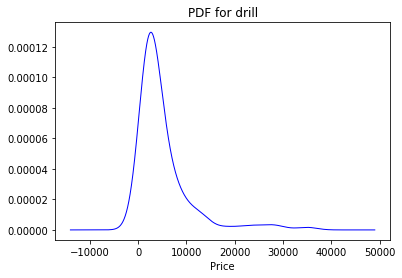

In [14]:
y_grid=np.linspace(np.amin(npa)-(np.amax(npa)-np.amin(npa))*0.4,np.amax(npa)+(np.amax(npa)-np.amin(npa))*0.4,10000)
ideal=1.06*(np.std(npa))*((len(npa)**(-1/5)))
pdf = kde_scipy(npa, y_grid, bandwidth=ideal)
plt.plot(y_grid, pdf, color='blue', alpha=1, lw=1)
plt.title('PDF for drill')
plt.xlabel('Price')
plt.show()

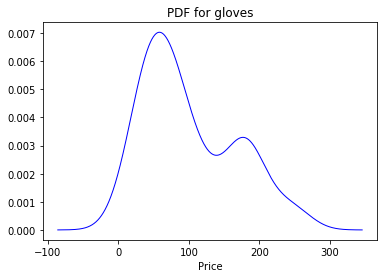

In [15]:
y_grid1=np.linspace(np.amin(npa1)-(np.amax(npa1)-np.amin(npa1))*0.4,np.amax(npa1)+(np.amax(npa1)-np.amin(npa1))*0.4,10000)
ideal1=1.06*(np.std(npa1))*((len(npa1)**(-1/5)))
pdf1 = kde_scipy(npa1, y_grid1, bandwidth=ideal1)
plt.plot(y_grid1, pdf1, color='blue', alpha=1, lw=1)
plt.title('PDF for gloves')
plt.xlabel('Price')
plt.show()

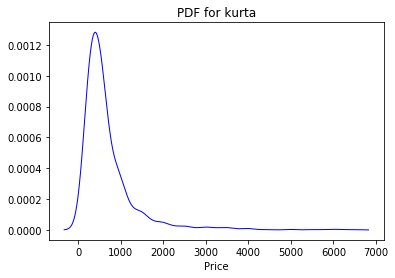

In [16]:
y_grid2=np.linspace(-(np.amax(npa2)-np.amin(npa2))*0.05,np.amax(npa2)*1.05,10000)
ideal2=1.06*(np.std(npa2))*((len(npa2)**(-1/5)))
pdf2 = kde_scipy(npa2, y_grid2, bandwidth=ideal2)
plt.plot(y_grid2, pdf2, color='blue', alpha=1, lw=1)
plt.title('PDF for kurta')
plt.xlabel('Price')
plt.show()

In [17]:
w=((np.amax(npa)-np.amin(npa))*1.8)/10000
w1=((np.amax(npa1)-np.amin(npa1))*1.8)/10000
w2=((np.amax(npa2)-np.amin(npa2))*0.05+np.amax(npa2)*1.05)/10000
print(np.sum(pdf)*w,np.sum(pdf1)*w1,np.sum(pdf2)*w2)

0.9998999999999422 0.9998891844204684 0.9998524408904884


In [18]:
pdf_area=np.zeros(len(pdf)-1)
for a in range(len(pdf_area)):
  pdf_area[a]=(pdf[a]+pdf[a+1])*(w/2)
print(np.sum(pdf_area))


0.9998999999999414


before going to calculation for area we need to make sure that probability of a product price below Rupees 0 is 0( for PDF calculated above we have finite probability for price less than 0 ) we can usee bayes theorem to re calculate the PDF.

\begin{equation*}
PDF(x | Price > 0)   = \frac{probab(x>0)*PDF(x)}{probab(Price >0)}
\end{equation*}
here PDF(x) is the pdf function 

probab(price >0) is probabilty that price >0 which sum of area under pdf for price >0

probab(x>0) is eiter 1 or 0 depending on x

0.9999999999999999


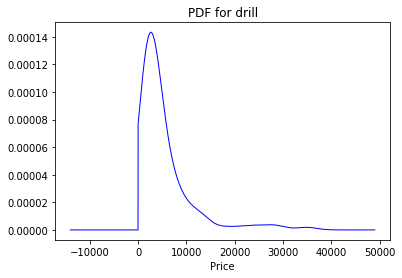

In [19]:
for a in range(len(pdf)):
  if y_grid[a] > 0:
    break
probab=np.sum(pdf[a:])*w
for a in range(len(pdf)):
  if y_grid[a] > 0:
    break
  pdf[a]=0
pdf=pdf/probab
print(np.sum(pdf)*w)
plt.plot(y_grid, pdf, color='blue', alpha=1, lw=1)
plt.title('PDF for drill')
plt.xlabel('Price')
plt.show()

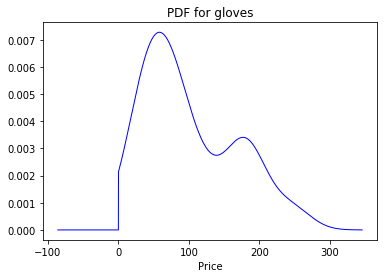

In [20]:
for a in range(len(pdf1)):
  if y_grid1[a] > 0:
    break
probab1=np.sum(pdf1[a:])*w1
for a in range(len(pdf1)):
  if y_grid1[a] > 0:
    break
  pdf1[a]=0
pdf1=pdf1/probab1
plt.plot(y_grid1, pdf1, color='blue', alpha=1, lw=1)
plt.title('PDF for gloves')
plt.xlabel('Price')
plt.show()

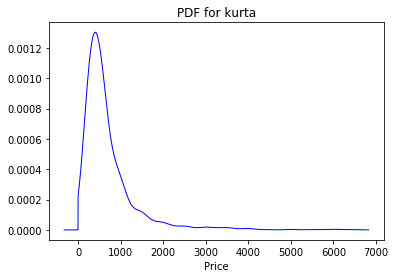

In [21]:
for a in range(len(pdf2)):
  if y_grid2[a] > 0:
    break
probab2=np.sum(pdf2[a:])*w2
for a in range(len(pdf2)):
  if y_grid2[a] > 0:
    break
  pdf2[a]=0
pdf2=pdf2/probab2
plt.plot(y_grid2, pdf2, color='blue', alpha=1, lw=1)
plt.title('PDF for kurta')
plt.xlabel('Price')
plt.show()

# Range calculation from PDF 
we used 2 methods for calculating a range they are 

1.   finding the peak and finding a range which covers 50% of the area under pdf and having peak as mean point of that range(it means there is 50% chance for a product to be in that range) this ensures price which has maximum entries lies in that region

2.   finding the smallest range which covers majority of the region(we can use range which covers 50% of the region)the advantage with this method is it ensures ranges is minimum.



In [22]:
f_peak=argrelextrema(pdf, np.greater)[0][0]
for q in range(f_peak):
  if np.sum(pdf[f_peak-q:f_peak+q])*w > 0.5:
    print(np.sum(pdf[f_peak-q:f_peak+q])*w,q)
    break
print('This is the range obtained for drill ',np.round((f_peak-q)*w+np.amin(npa)-(np.amax(npa)-np.amin(npa))*0.4),np.round((f_peak+q)*w+np.amin(npa)-(np.amax(npa)-np.amin(npa))*0.4))

0.501110079294637 305
This is the range obtained for drill  744.0 4587.0


In [23]:
f_peak1=argrelextrema(pdf1, np.greater)[0][0]
q=0
for q in range(f_peak1):
  if np.sum(pdf1[f_peak1-q:f_peak1+2*q])*w1 > 0.5:
    print(np.sum(pdf1[f_peak1-q:f_peak1+2*q])*w1,q)
    break
print('This is the range obtained for gloves ',np.round((f_peak1-q)*w1+np.amin(npa1)-(np.amax(npa1)-np.amin(npa1))*0.4),np.round((f_peak1+2*q)*w1+np.amin(npa1)-(np.amax(npa1)-np.amin(npa1))*0.4))

0.5002862757644444 633
This is the range obtained for gloves  31.0 113.0


In [24]:
f_peak2=argrelextrema(pdf2, np.greater)[0][0]
for q in range(f_peak2):
  if np.sum(pdf2[f_peak2-q:f_peak2+q])*w2 > 0.5:
    print(np.sum(pdf2[f_peak2-q:f_peak2+q])*w2,q)
    break
print('This is the range obtained for Kurta ',np.round((f_peak2-q)*w2-(np.amax(npa2)-np.amin(npa2))*0.05),np.round((f_peak2+q)*w2-(np.amax(npa2)-np.amin(npa2))*0.05))

0.500915190216567 301
This is the range obtained for Kurta  190.0 620.0


In [25]:
qq1=len(pdf)
for q in range(len(pdf)):
  for p in range(len(pdf)-(q+1)):
     if np.sum(pdf[p:p+q+1])*w > 0.5:
        print(np.sum(pdf[p:p+q+1])*w,p,q)
        break
  if np.sum(pdf[p:p+q+1])*w > 0.5:
    break
print('This is the range obtained for drill ',np.round((p)*w+np.amin(npa)-(np.amax(npa)-np.amin(npa))*0.4),np.round((p+q+1)*w+np.amin(npa)-(np.amax(npa)-np.amin(npa))*0.4))  
     
        

0.5000128339010116 2349 607
This is the range obtained for drill  801.0 4631.0


In [26]:
qq2=len(pdf1)
for q in range(len(pdf1)):
  for p in range(len(pdf1)-(q+1)):
     if np.sum(pdf1[p:p+q+1])*w1 > 0.5:
        print(np.sum(pdf1[p:p+q+1])*w1,p,q)
        break
  if np.sum(pdf1[p:p+q+1])*w1 > 0.5:
    break
print('This is the range obtained for gloves ',np.round((p)*w1+np.amin(npa1)-(np.amax(npa1)-np.amin(npa1))*0.4),np.round((p+q+1)*w1+np.amin(npa1)-(np.amax(npa1)-np.amin(npa1))*0.4))  
 

0.5000041449101842 2463 1841
This is the range obtained for gloves  20.0 100.0


In [27]:
qq3=len(pdf2)
for q in range(len(pdf2)):
  for p in range(len(pdf2)-(q+1)):
     if np.sum(pdf2[p:p+q+1])*w2 > 0.6:
        print(np.sum(pdf2[p:p+q+1])*w2,p,q)
        break
  if np.sum(pdf2[p:p+q+1])*w2 > 0.6:
    break
print('This is the range obtained for Kurta ',np.round((p)*w2-(np.amax(npa2)-np.amin(npa2))*0.05),np.round((p+q+1)*w2-(np.amax(npa2)-np.amin(npa2))*0.05))

0.6000021871120567 667 768
This is the range obtained for Kurta  152.0 702.0
